In [1]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
engine = create_engine('sqlite:///pitchfork.sqlite')
conn = engine.connect()

In [3]:
print(engine.table_names())

['artists', 'content', 'genres', 'labels', 'reviews', 'years']


In [4]:
review_data = pd.read_sql("SELECT * FROM reviews", conn)
artists_data = pd.read_sql("SELECT * FROM artists", conn)
content_data = pd.read_sql("SELECT * FROM content", conn)
genres_data = pd.read_sql("SELECT * FROM genres", conn)
labels_data = pd.read_sql("SELECT * FROM labels", conn)
years_data = pd.read_sql("SELECT * FROM years", conn)

In [5]:
master_data = review_data.merge(genres_data, how = 'left')

In [6]:
set(master_data.genre)

{None,
 'electronic',
 'experimental',
 'folk/country',
 'global',
 'jazz',
 'metal',
 'pop/r&b',
 'rap',
 'rock'}

C:\Users\Eric\AppData\Local\Programs\Python\Python36-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Eric\AppData\Local\Programs\Python\Python36-32\lib\site-packages\seaborn\distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\Eric\AppData\Local\Programs\Python\Python36-32\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


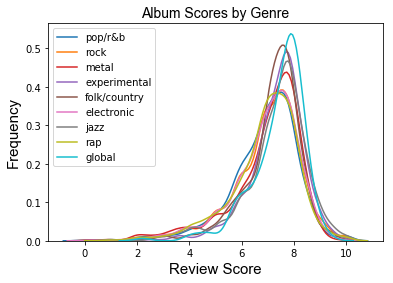

In [7]:
for _ in set(master_data.genre):
    sns.distplot(master_data.score[master_data.genre == _], kde = True, hist = False, label = _)

plt.ylabel('Frequency',fontname = 'Arial', fontsize = 15)
plt.xlabel('Review Score', fontname = 'Arial', fontsize = 15)
plt.title('Album Scores by Genre', fontname = 'Arial', fontsize = 14)
plt.savefig('test.png', orientation = 'landscape', dpi = 1800)

In [8]:
review_data.keys()

Index(['reviewid', 'title', 'artist', 'url', 'score', 'best_new_music',
       'author', 'author_type', 'pub_date', 'pub_weekday', 'pub_day',
       'pub_month', 'pub_year'],
      dtype='object')

In [9]:
review

NameError: name 'review' is not defined

In [ ]:
print(engine.table_names())

In [ ]:
review_data.head()

In [ ]:
set(review_data)

In [13]:
review_data.groupby(by = 'pub_year')['reviewid'].count()

pub_year
1999     223
2000     348
2001     456
2002     923
2003    1060
2004    1121
2005    1186
2006    1189
2007    1216
2008    1201
2009    1171
2010    1170
2011    1165
2012    1185
2013    1200
2014    1162
2015    1135
2016    1265
2017      17
Name: reviewid, dtype: int64